In [7]:
%load_ext autoreload
%autoreload 2
from itertools  import pairwise
from threader   import Threader
from geometry   import GSegment, GPoint, list2gsegments
from tlayer     import TLayer
from gcode_file import GcodeFile
from pathlib    import Path
from util       import deep_update

from Geometry3D import HalfLine, Segment, Point
from Geometry3D.calc import intersection

import logger, plotting, plot_styles
import plot_helpers, util
import sys
import plotly.graph_objects as go

from plot_helpers import quickplot
    
from manualprinter import Manualprinter

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
test_root = Path('./example/manual test - prusa mini/')
gcode_filename = test_root.joinpath('manual test - prusa mini - prusaslicer.gcode')
thread_geom = [
    (99.66, 45.253, 1),
    (94.516, 77.068, 1),
    (70.313, 95.837, 1),
]

In [24]:
logger.restart_logging()
gcode = GcodeFile(gcode_filename, layer_class=TLayer)
threader = Threader(gcode, 'manualprinter.yaml', thread_geom)
threader.route_model()

Accordion()

Loaded general config: {'initial_thread_angle': 90, 'defaults': {'head_raise': 1, 'head_raise_speed': 200, 
'overlap_length': 2, 'move_feedrate': -1, 'extrude_multiply': -1, 'post_pause': -1}, 'anchor_fixing': 
{'head_raise': 1, 'head_raise_speed': 200, 'overlap_length': 2, 'move_feedrate': 500, 'extrude_multiply': 3, 
'post_pause': 2}, 'extruding': {'head_raise': 1, 'head_raise_speed': 200, 'overlap_length': 2, 'move_feedrate': -1,
'extrude_multiply': 1, 'post_pause': 0}, 'non_extruding': {'head_raise': 1, 'head_raise_speed': 200, 
'overlap_length': 2, 'move_feedrate': 500, 'extrude_multiply': -1, 'post_pause': -1}}

Loaded bed: {'zero': {  0.00,   0.00,   0.00}, 'size': [180, 180], 'anchor': { 45.00,   0.00,   0.00}}

Bed now: {'zero': {  0.00,   0.00,   0.00}, 'size': [180, 180], 'anchor': { 45.00,   0.00,   0.00}}

In [25]:
threader.save(test_root.joinpath('basic test-routed-manual.gcode'))

In [16]:
paper_styles = deep_update(plot_helpers.styles, {
    'future_thread': {'line': dict(color='LightSlateGrey',    width=3,  dash='dash')},
    'gc_segs':       {'line': dict(width=2)},
    #'old_segs':      {'line': dict(width=2)},
    'to_print':      {'line': dict(color='#1192e8', dash='dot'), 'opacity': 1},
    'thread_ring':   {'line': dict(color='#b28600', width=3, dash='dot')},
    'printed_thread':{'line': dict(color='#b28600', width=3, dash=None)},
    'anchor':        {'marker': dict(symbol='circle', size=6)},
    'original_thread': {'line': dict(color='gray', width=2, dash='dot')},
    'original_anchor': {'marker': dict(color='gray', symbol='circle', size=6)},
    'next_anchor':     {'marker': dict(symbol='circle', size=6, color='white', line=dict(width=2, color='red'))},
})

Preview of 12 steps for layer 4


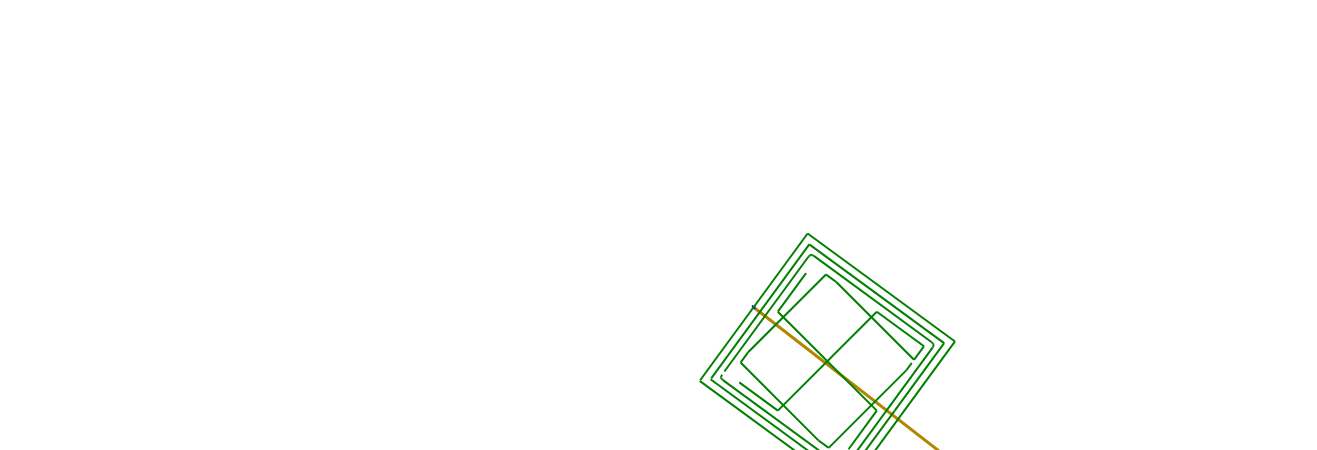

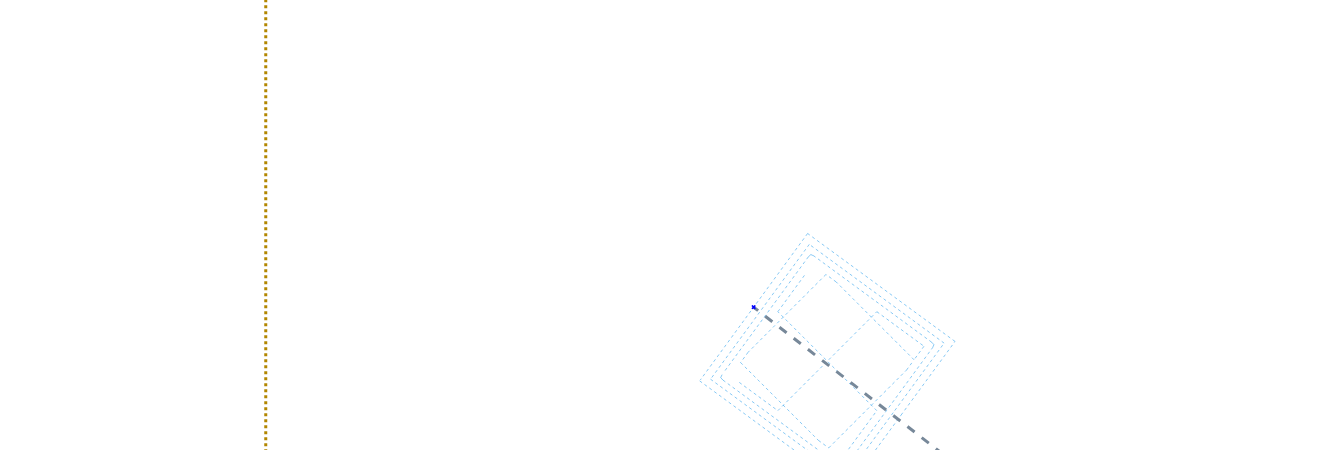

Step 0: Rotate thread at { 45.00,   0.00,   1.00} to overlap next anchor at { 99.66,  45.48,   1.00}
H({ 45.00,   0.00,   1.00}, ↗ 39.76° ( 54.66,  45.48,   0.00))


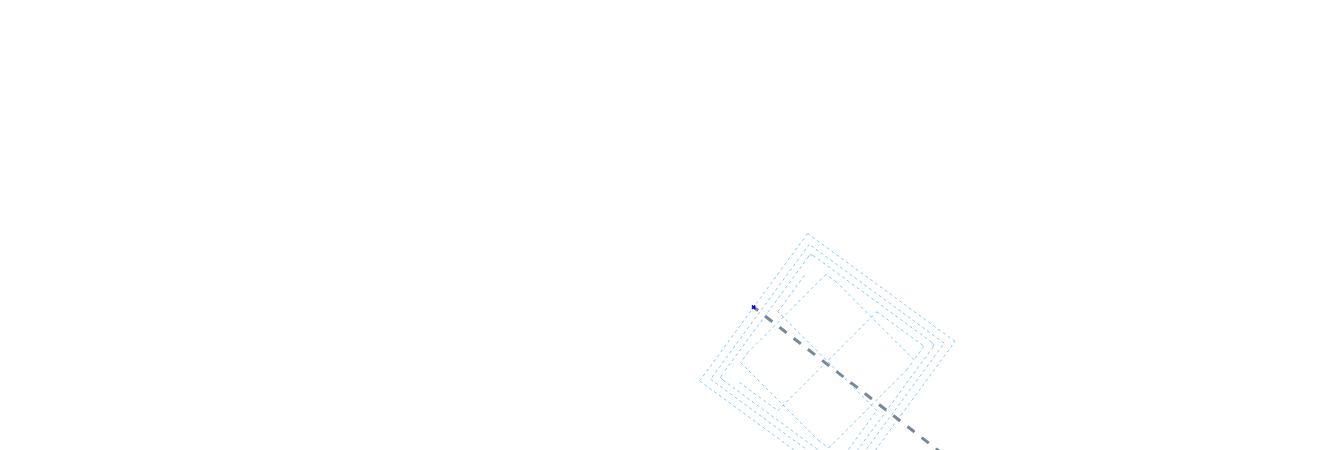

Step 1: Print 1 segment to fix anchor
H({ 99.66,  45.48,   1.00}, ↗ 39.76° ( 54.66,  45.48,   0.00))


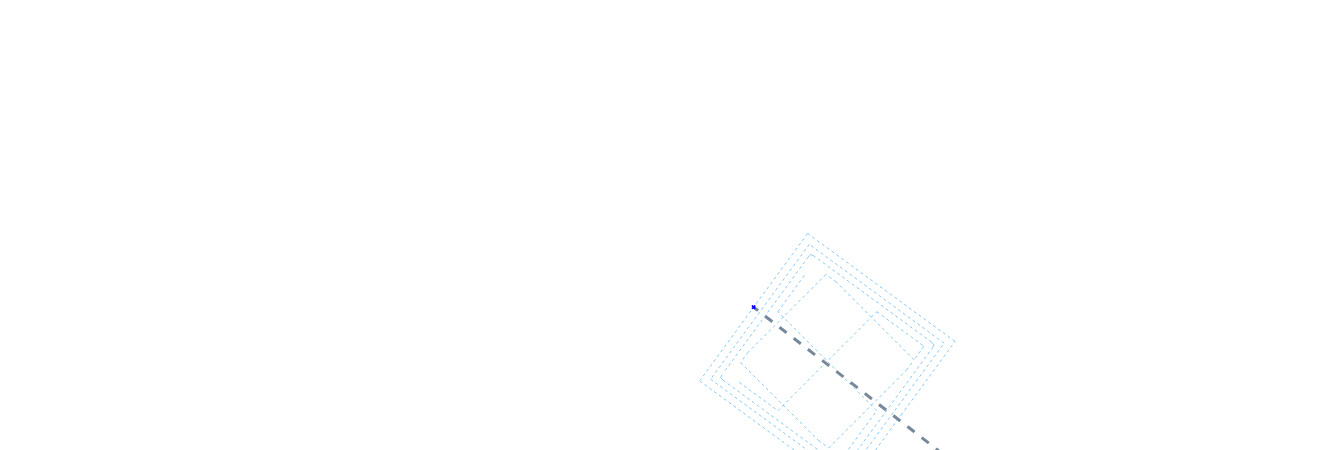

Step 2: Rotate thread at { 99.66,  45.48,   1.00} to overlap next anchor at { 94.52,  77.07,   1.00}
H({ 99.66,  45.48,   1.00}, ↗ 99.25° ( -5.14,  31.59,   0.00))


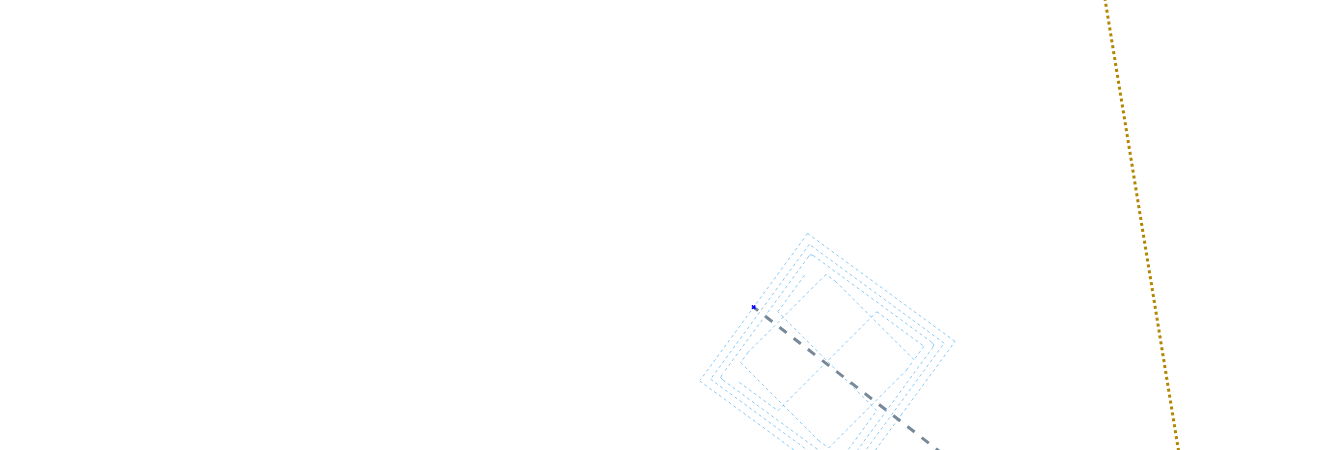

Step 3: Print 1 segment to fix anchor
H({ 94.52,  77.07,   1.00}, ↗ 99.25° ( -5.14,  31.59,   0.00))


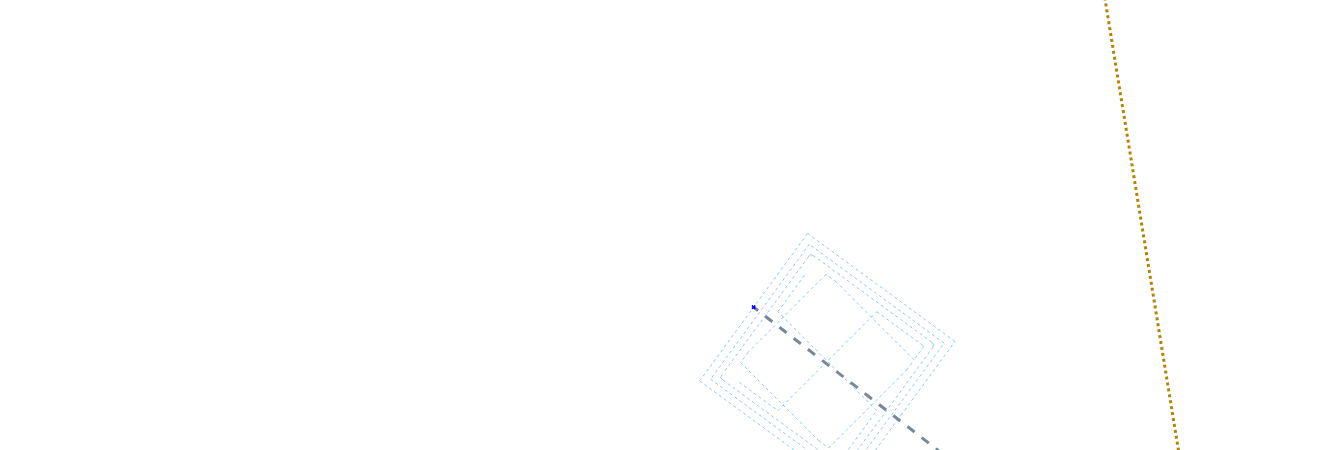

Skip 4
Step 5: Print 18 segments thread doesn't intersect
H({ 94.52,  77.07,   1.00}, ↗ 99.25° ( -5.14,  31.59,   0.00))
print_thread_isecs=[{ 97.73,  57.32,   1.00}, { 99.59,  45.88,   1.00}, { 97.67,  57.73,   1.00}, { 97.85,  56.57,   1.00}, { 98.47,  52.79,   1.00}, { 98.16,  54.70,   1.00}, { 99.36,  47.29,   1.00}, { 99.47,  46.64,   1.00}, { 99.45,  46.78,   1.00}, { 98.80,  50.74,   1.00}, { 99.54,  46.23,   1.00}, { 97.79,  56.98,   1.00}, { 95.62,  70.31,   1.00}, { 95.68,  69.91,   1.00}, { 95.41,  71.57,   1.00}, { 95.50,  71.05,   1.00}, { 95.16,  73.11,   1.00}, { 95.56,  70.65,   1.00}]


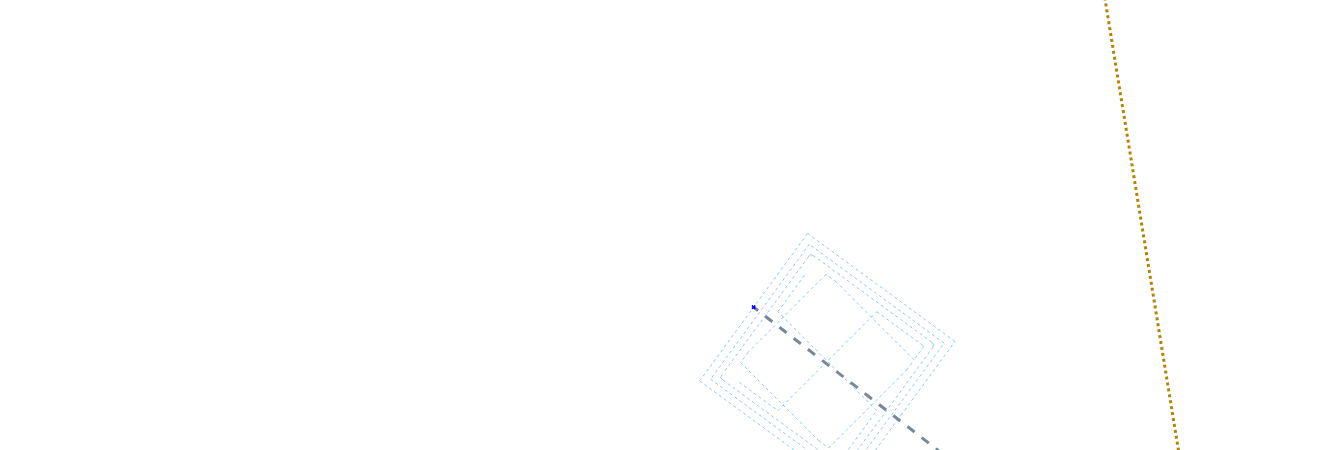

Step 6: Rotate thread at { 94.52,  77.07,   1.00} to overlap next anchor at { 70.49,  95.70,   1.00}
H({ 94.52,  77.07,   1.00}, ↗142.20° (-24.02,  18.64,   0.00))


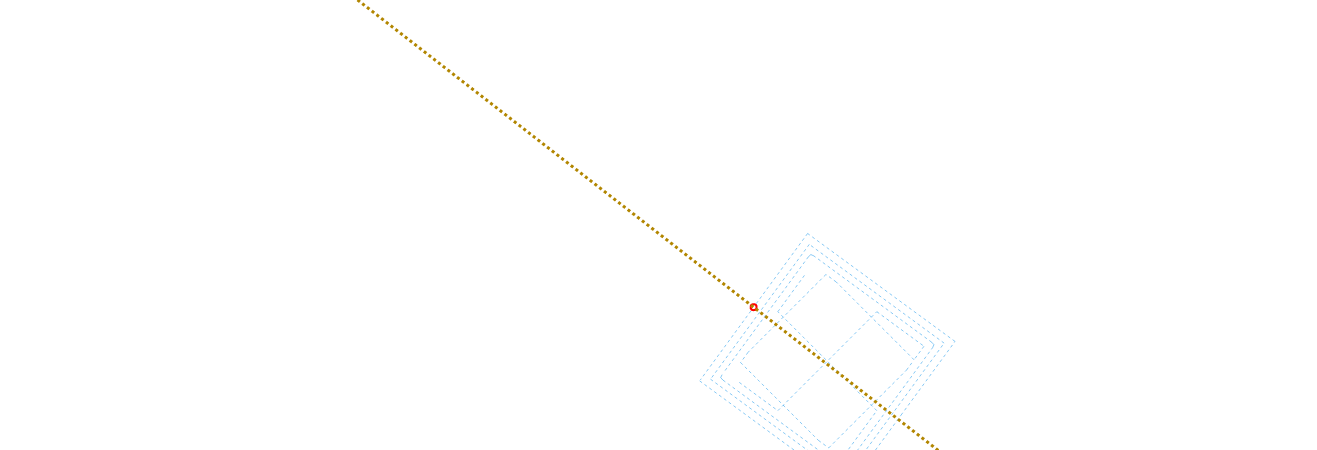

Step 7: Print 1 segment to fix anchor
H({ 70.49,  95.70,   1.00}, ↗142.20° (-24.02,  18.64,   0.00))


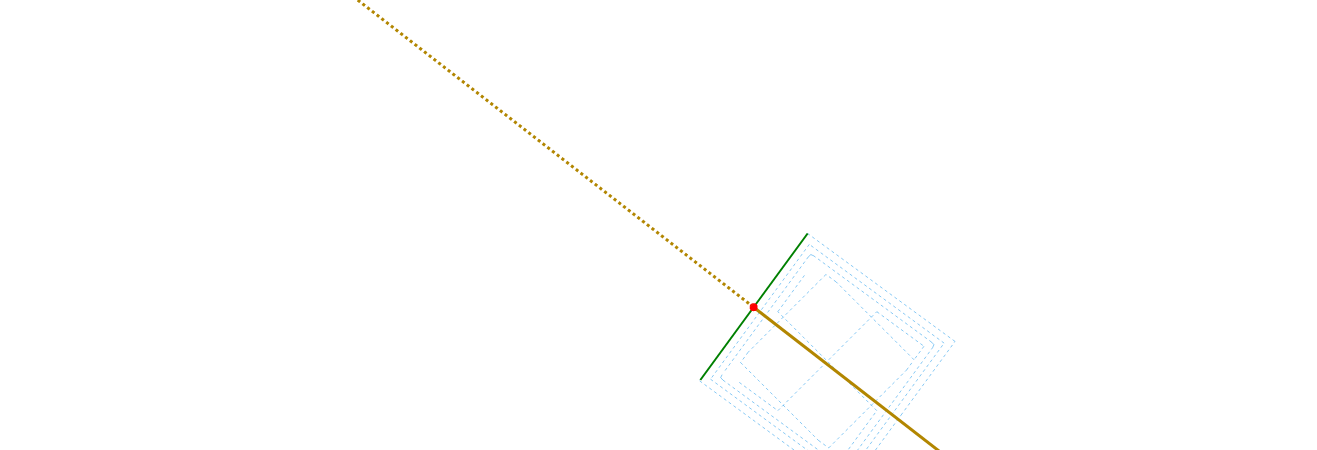

Skip 8
Step 9: Print 15 segments thread doesn't intersect
H({ 70.49,  95.70,   1.00}, ↗142.20° (-24.02,  18.64,   0.00))
print_thread_isecs=[{ 89.10,  81.27,   1.00}, { 88.77,  81.52,   1.00}, { 89.69,  80.81,   1.00}, { 91.92,  79.08,   1.00}, { 94.52,  77.07,   1.00}, { 89.37,  81.06,   1.00}, { 77.72,  90.10,   1.00}, { 70.82,  95.45,   1.00}, { 78.04,  89.85,   1.00}, { 77.45,  90.31,   1.00}, { 71.09,  95.24,   1.00}, { 74.25,  92.79,   1.00}, { 71.66,  94.80,   1.00}, { 76.85,  90.78,   1.00}, { 75.09,  92.14,   1.00}]


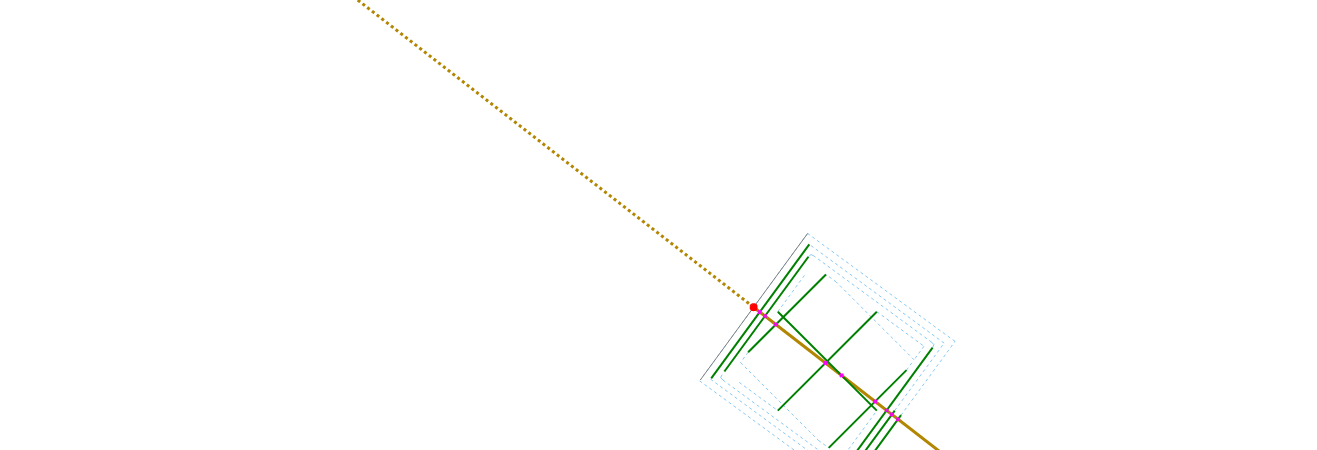

Skip 10
Step 11: Print 296 segments thread doesn't intersect
H({ 70.49,  95.70,   1.00}, ↗142.20° (-24.02,  18.64,   0.00))


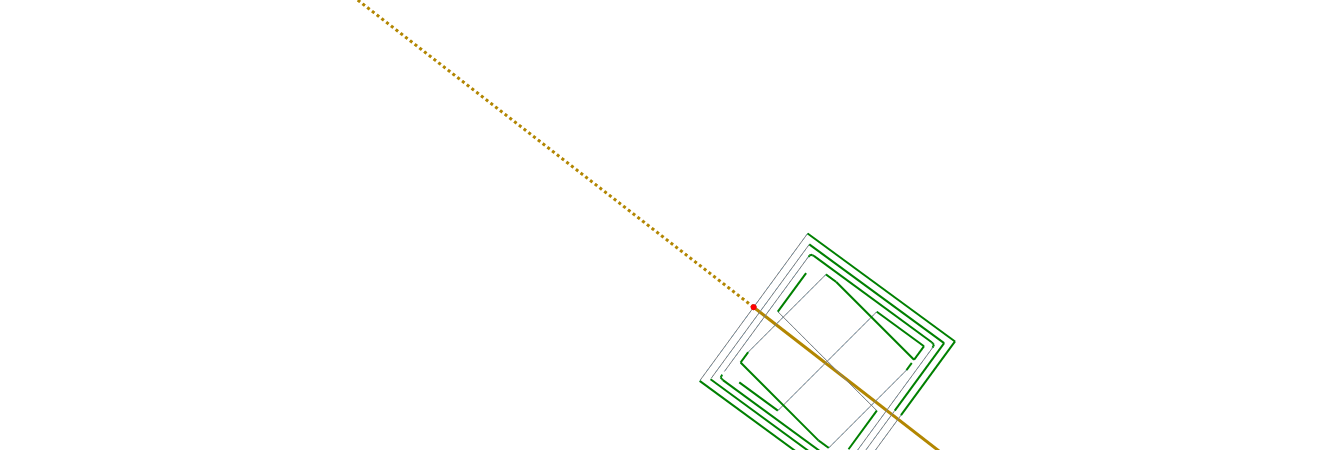

Finished routing this layer


In [17]:
test_layer = 4
figs = plotting.plot_steps(threader.layer_steps[test_layer], template='plotly_white',
    styles=paper_styles,
    zoom_box=((60.2, 90.2), (69.8, 109.8)),
    show_args={
        'xaxis':dict(showgrid=False, showticklabels=False),
        'yaxis':dict(showgrid=False, showticklabels=False)
    },
                           #show=False
                          )#, prev_layer=gcode.layers[test_layer-1], prev_layer_only_outline=False, preview_layer=False)
#plotting.plot_test(threader.layer_steps[1])

In [19]:
test_root = Path('./example/manual test - prusa mini/')
gcode_filename = test_root.joinpath('manual test - prusa mini - prusaslicer - grabbers.gcode')
thread_geom = [
    (99.66, 45.253, 1),
    (94.516, 77.068, 1),
    (70.313, 95.837, 1),
]

In [20]:
logger.restart_logging()
gcode = GcodeFile(gcode_filename, layer_class=TLayer)
threader = Threader(gcode, 'manualprinter.yaml', thread_geom)
threader.route_model()

Accordion()

Loaded general config: {'initial_thread_angle': 90, 'defaults': {'head_raise': 1, 'head_raise_speed': 200, 
'overlap_length': 2, 'move_feedrate': -1, 'extrude_multiply': -1, 'post_pause': -1}, 'anchor_fixing': 
{'head_raise': 1, 'head_raise_speed': 200, 'overlap_length': 2, 'move_feedrate': 500, 'extrude_multiply': 3, 
'post_pause': 2}, 'extruding': {'head_raise': 1, 'head_raise_speed': 200, 'overlap_length': 2, 'move_feedrate': -1,
'extrude_multiply': 1, 'post_pause': 0}, 'non_extruding': {'head_raise': 1, 'head_raise_speed': 200, 
'overlap_length': 2, 'move_feedrate': 500, 'extrude_multiply': -1, 'post_pause': -1}}

Loaded bed: {'zero': {  0.00,   0.00,   0.00}, 'size': [180, 180], 'anchor': { 45.00,   0.00,   0.00}}

Bed now: {'zero': {  0.00,   0.00,   0.00}, 'size': [180, 180], 'anchor': { 45.00,   0.00,   0.00}}

In [22]:
threader.save(test_root.joinpath('basic test-routed-manual-grabbers.gcode'))